In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing dataset and checking it's shape
#(row,column)
DataFrame = pd.read_csv("train.csv")
DataFrame.shape

(404290, 6)

In [3]:
#extracted 100000 rows from that dataset
new_DataFrame = DataFrame.sample(100000,random_state=2)

In [4]:
#Prints top 5 rows
new_DataFrame.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [5]:
new_DataFrame.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
120077,120077,39691,98962,What is the key to confidence?,I need to lose weight. It gives me mental issu...,0
68744,68744,118752,118753,What innovative steps can be taken to ensure t...,What innovative steps can be taken to make peo...,1
205228,205228,308315,185958,How can you get pregnant during miscarriage?,How can you get pregnant? And why can't you?,0
335168,335168,462422,462423,Why is my flaccid penis so small?,Why is my flaccid penis so small but when it e...,1
372688,372688,11139,75895,Is it true that Arnab Goswami quit Times Now? ...,Why Arnab Goswami resigned times now?,1
205503,205503,308672,308673,Which are the best Moodle Plugins?,Which web hosting provider should I choose if ...,0
51886,51886,91965,91966,Why was Christopher Columbus considered a vill...,Why was Christopher Columbus considered a vill...,1
138142,138142,220048,220049,The characters in hundred questions?,What are some of the personal qualities that a...,0
129698,129698,208290,208291,How can I get the prisma effects in my android...,How can I get Prisma equivalent app in Android?,1
49144,49144,87499,87500,We are selling our house for 80 Lakhs. How muc...,How much capital gain tax is payable if you se...,0


In [6]:
new_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 398782 to 165218
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            100000 non-null  int64 
 1   qid1          100000 non-null  int64 
 2   qid2          100000 non-null  int64 
 3   question1     100000 non-null  object
 4   question2     99999 non-null   object
 5   is_duplicate  100000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.3+ MB


In [7]:
#missing values
new_DataFrame.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [8]:
#duplicate rows
new_DataFrame.duplicated().sum()

np.int64(0)

is_duplicate
0    63215
1    36785
Name: count, dtype: int64
is_duplicate
0    15.636053
1     9.098667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

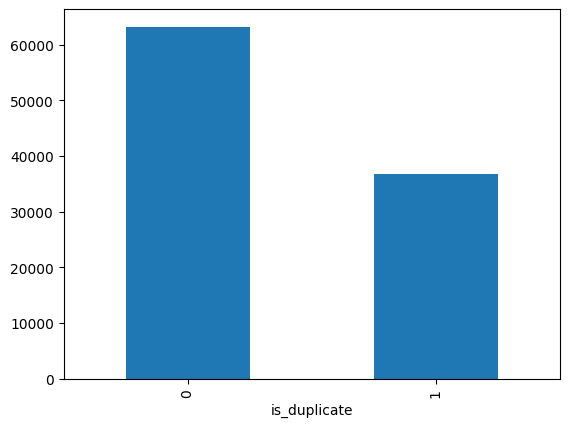

In [9]:
#distribution of duplicate and non-duplicate questions
print(new_DataFrame['is_duplicate'].value_counts())
print((new_DataFrame['is_duplicate'].value_counts()/DataFrame['is_duplicate'].count())*100)
new_DataFrame['is_duplicate'].value_counts().plot(kind='bar')


In [10]:
# Combine all questions from both columns
qid = pd.Series(new_DataFrame['qid1'].tolist() + new_DataFrame['qid2'].tolist())

# Number of unique questions
print('Number of unique questions:', np.unique(qid).shape[0])

# Count repeated questions
x = qid.value_counts() > 1
print('Number of questions getting repeated:', x[x].shape[0])

Number of unique questions: 165976
Number of questions getting repeated: 19488


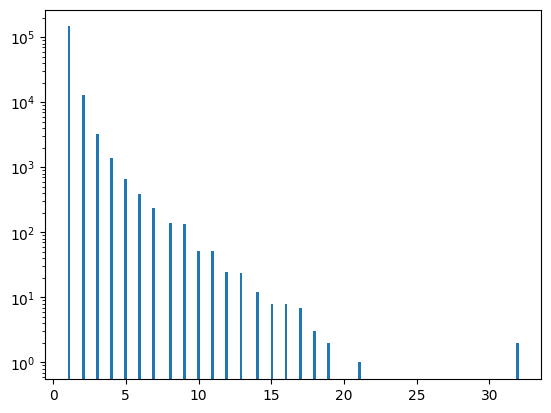

In [11]:
#repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [12]:
# Preprocessing: cleaning and preparing data so that computer can understand and use it better.

def preprocess(question):
    # Convert to string, lowercase, and remove leading/trailing spaces
    question = str(question).lower().strip()

    # Replace special characters with words
    question = question.replace('%',' percent ')
    question = question.replace('$',' dollar ')
    question = question.replace('@',' at ')
    question = question.replace('€',' euro ')
    question = question.replace('£',' pound ')
    question = question.replace('₹',' rupee ')

    # Replace large numbers with abbreviations
    question = question.replace(',000,000,000','b ')
    question = question.replace(',000,000','m ')
    question = question.replace(',000','k ')
    question = re.sub(r'([0-9]+)000000000', r'\1b', question)# billions
    question = re.sub(r'([0-9]+)000000', r'\1m', question)# millions
    question = re.sub(r'([0-9]+)000', r'\1k', question)# thousands

    # Decontract words using a dictionary
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    

    # Split question into words and replace contractions
    question_decontracted = []
    for word in question.split():
        if word in contractions:
            word = contractions[word]
        question_decontracted.append(word)

    # Join words back into a sentence
    question = ' '.join(question_decontracted)

    # Remove any remaining HTML tags
    question = BeautifulSoup(question, "html.parser").get_text()

    # Remove punctuation using regex
    pattern = re.compile(r'\W')
    question = re.sub(pattern,' ',question)
    question = re.sub(r'\s+', ' ', question).strip() 

    return question


In [13]:
# Example sentence
question = "<p>I'm so happy! I earned $1,500,000 this year, and it's amazing!</p>"
# Preprocess the sentence
cleaned_question = preprocess(question)
print(cleaned_question)


i m so happy i earned dollar 1 500k this year and it is amazing


In [14]:
# Apply preprocess function to both question columns
new_DataFrame['question1'] = new_DataFrame['question1'].apply(preprocess)
new_DataFrame['question2'] = new_DataFrame['question2'].apply(preprocess)


In [15]:
new_DataFrame.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [16]:
#Adding features

In [17]:
# Add new columns for question lengths
new_DataFrame['q1_len'] = new_DataFrame['question1'].str.len() # length of question1
new_DataFrame['q2_len'] = new_DataFrame['question2'].str.len() # length of question2

In [18]:
# Add new columns for word count
new_DataFrame['q1_word_count'] = new_DataFrame['question1'].apply(lambda row: len(str(row).split())) # number of words in q1
new_DataFrame['q2_word_count'] = new_DataFrame['question2'].apply(lambda row: len(str(row).split())) # number of words in q2


In [19]:
new_DataFrame.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9


In [20]:
def common_words(row):
    # Split q1 and q2 into words, make them lowercase, and remove extra spaces
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    
    # Find common words between both questions and count them
    return len(w1 & w2)


In [21]:
# Calculate common words for each row
new_DataFrame['word_common'] = new_DataFrame.apply(common_words, axis=1)
# Display first few rows to check the new column
new_DataFrame.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,word_common
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,7
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,3
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3


In [22]:

def total_words(row):
    # Get unique words from q1 and q2
    w1 = set(word.lower().strip() for word in row['question1'].split())
    w2 = set(word.lower().strip() for word in row['question2'].split())
    
    # Return total number of unique words in both questions
    return len(w1) + len(w2)


In [23]:
new_DataFrame['word_total'] = new_DataFrame.apply(total_words, axis=1)
new_DataFrame.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,word_common,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,7,22
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,3,36
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,0,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13


In [24]:
# Calculate the word share ratio
new_DataFrame['word_share'] = round(new_DataFrame['word_common'] / new_DataFrame['word_total'], 2)  

In [25]:
new_DataFrame.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,7,22,0.32
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,3,36,0.08
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,0,32,0.00
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,0.23


minimum characters 0
maximum characters 391
average num of characters 58


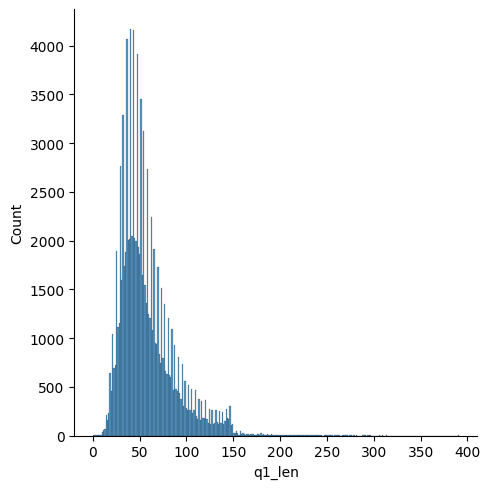

In [26]:
# Analysis of features
sns.displot(new_DataFrame['q1_len'])
print('minimum characters',new_DataFrame['q1_len'].min())
print('maximum characters',new_DataFrame['q1_len'].max())
print('average num of characters',int(new_DataFrame['q1_len'].mean()))

minimum characters 0
maximum characters 1140
average num of characters 58


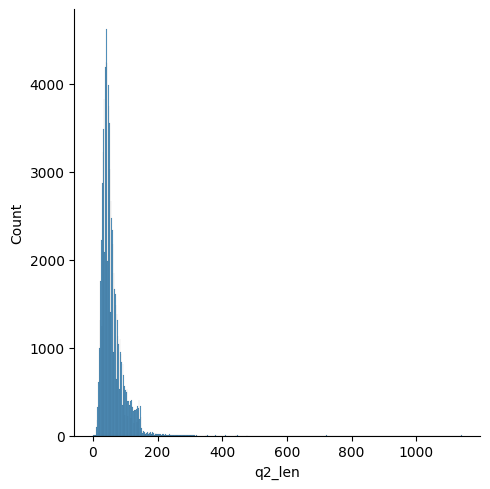

In [27]:
sns.displot(new_DataFrame['q2_len'])
print('minimum characters',new_DataFrame['q2_len'].min())
print('maximum characters',new_DataFrame['q2_len'].max())
print('average num of characters',int(new_DataFrame['q2_len'].mean()))

minimum words 0
maximum words 73
average num of words 11


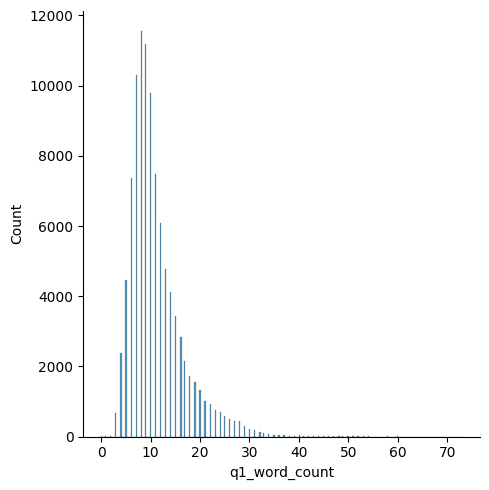

In [28]:
sns.displot(new_DataFrame['q1_word_count'])
print('minimum words',new_DataFrame['q1_word_count'].min())
print('maximum words',new_DataFrame['q1_word_count'].max())
print('average num of words',int(new_DataFrame['q1_word_count'].mean()))

minimum words 0
maximum words 248
average num of words 11


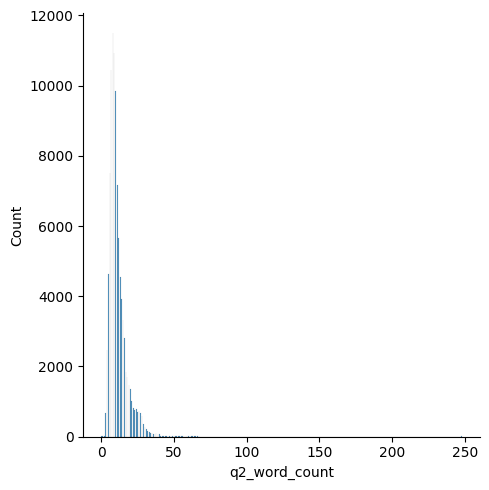

In [29]:
sns.displot(new_DataFrame['q2_word_count'])
print('minimum words',new_DataFrame['q2_word_count'].min())
print('maximum words',new_DataFrame['q2_word_count'].max())
print('average num of words',int(new_DataFrame['q2_word_count'].mean()))

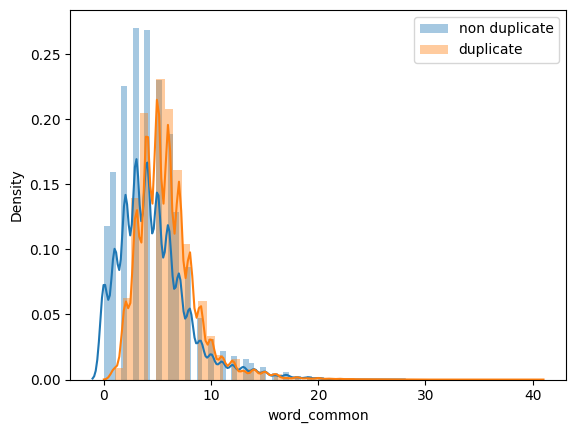

In [30]:
# common words
sns.distplot(new_DataFrame[new_DataFrame['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_DataFrame[new_DataFrame['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

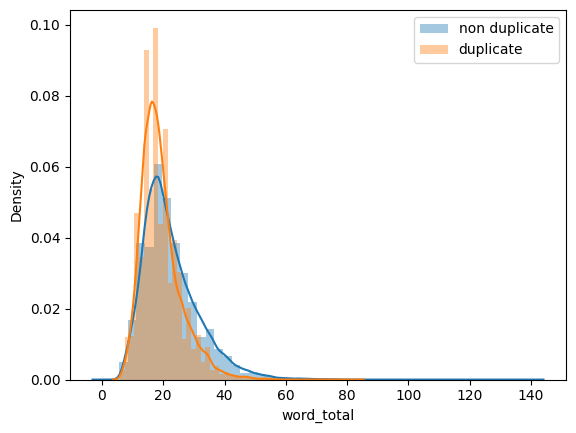

In [31]:
# total words
sns.distplot(new_DataFrame[new_DataFrame['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_DataFrame[new_DataFrame['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

In [32]:
import nltk
nltk.download('stopwords', download_dir='D:/pythonapp/dataset')

[nltk_data] Downloading package stopwords to D:/pythonapp/dataset...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import nltk
nltk.data.path.append('D:/pythonapp/dataset')


In [34]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1 = str(row['question1']).lower()
    q2 = str(row['question2']).lower()

    STOP_WORDS = set(stopwords.words("english"))
    SAFE_DIV = 0.0001  # small number to prevent division by zero

    token_features = [0.0] * 8

    # Convert sentences to tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Non-stopwords
    q1_words = set([w for w in q1_tokens if w not in STOP_WORDS])
    q2_words = set([w for w in q2_tokens if w not in STOP_WORDS])

    # Stopwords
    q1_stops = set([w for w in q1_tokens if w in STOP_WORDS])
    q2_stops = set([w for w in q2_tokens if w in STOP_WORDS])

    # Common counts
    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    # Features using SAFE_DIV
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word same?
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word same?
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [35]:
# Apply the function to each row
token_features = new_DataFrame.apply(fetch_token_features, axis=1)

# Unpack each feature into separate columns
new_DataFrame["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_DataFrame["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_DataFrame["csc_min"]       = list(map(lambda x: x[2], token_features))
new_DataFrame["csc_max"]       = list(map(lambda x: x[3], token_features))
new_DataFrame["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_DataFrame["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_DataFrame["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_DataFrame["first_word_eq"] = list(map(lambda x: x[7], token_features))

# Checks the DataFrame
new_DataFrame.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,...,22,0.32,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,...,36,0.08,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,...,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,13,0.23,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0


In [36]:
import distance 

def fetch_length_features(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])

    length_features = [0.0] * 3

    # Convert sentences to tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # 1. Absolute difference in token length
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # 2. Average token length of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # 3. Longest common substring ratio
    strs = list(distance.lcsubstrings(q1, q2))  # returns list of common substrings
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features


In [37]:
# Apply the length feature function to each row
length_features = new_DataFrame.apply(fetch_length_features, axis=1)

# Unpack the features into separate columns
new_DataFrame['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_DataFrame['mean_len'] = list(map(lambda x: x[1], length_features))
new_DataFrame['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

# Check the dataset
new_DataFrame.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,...,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.229167
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,...,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.048544
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.051724
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857


In [38]:
from fuzzywuzzy import fuzz  

def fetch_fuzzy_features(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])

    fuzzy_features = [0.0] * 4

    # 1. Fuzz ratio (basic string similarity)
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # 2. Partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # 3. Token sort ratio (ignores word order)
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # 4. Token set ratio (ignores duplicate words)
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


In [39]:
# Apply fuzzy features to each row
fuzzy_features = new_DataFrame.apply(fetch_fuzzy_features, axis=1)

# Unpack into separate columns
new_DataFrame['fuzz_ratio']        = list(map(lambda x: x[0], fuzzy_features))
new_DataFrame['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_DataFrame['token_sort_ratio']  = list(map(lambda x: x[2], fuzzy_features))
new_DataFrame['token_set_ratio']   = list(map(lambda x: x[3], fuzzy_features))


In [40]:
new_DataFrame.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,...,0.466664,1.0,1.0,3.0,13.5,0.229167,69,66,67,74
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,...,0.115384,0.0,0.0,6.0,23.0,0.048544,42,41,39,46
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,...,0.000000,0.0,0.0,17.0,21.5,0.051724,37,49,38,40
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1.0,0.0,4.0,7.0,0.542857,60,71,48,69


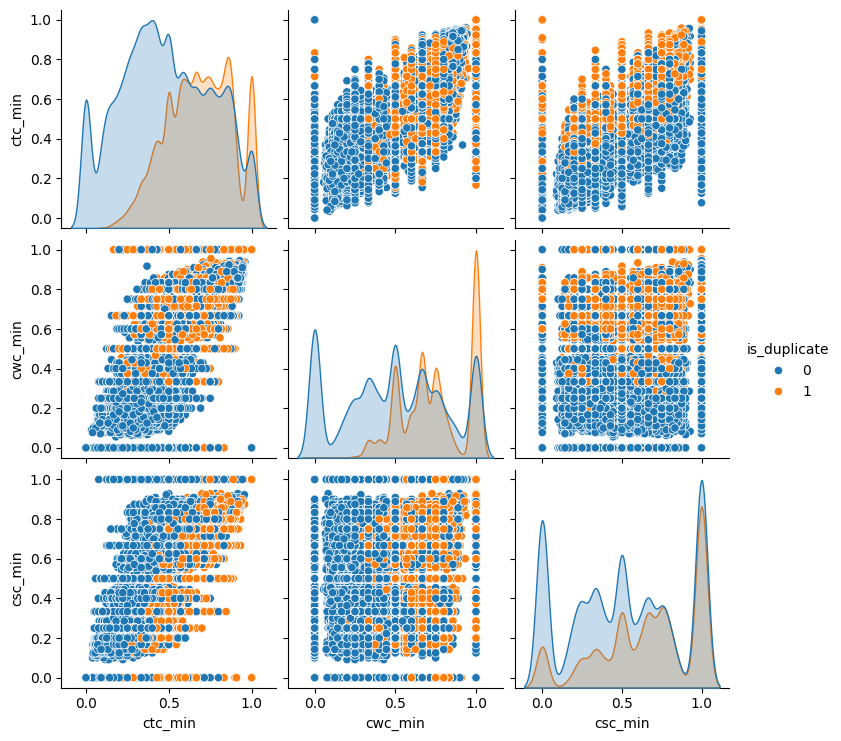

In [41]:
sns.pairplot(
    new_DataFrame[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],
    hue='is_duplicate'
)

plt.show()

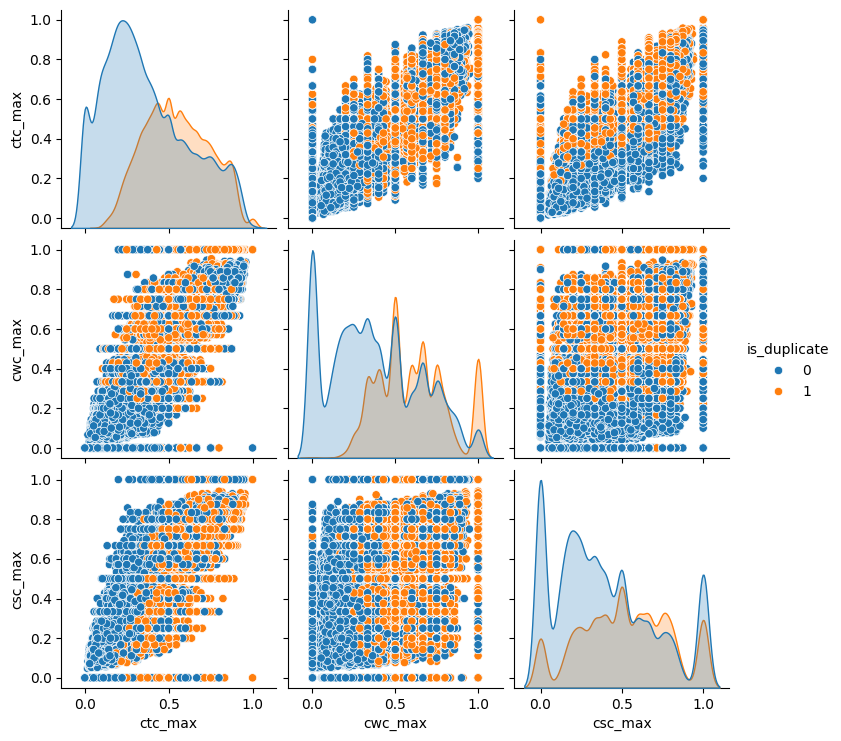

In [42]:
sns.pairplot(
    new_DataFrame[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],
    hue='is_duplicate'
)

plt.show()


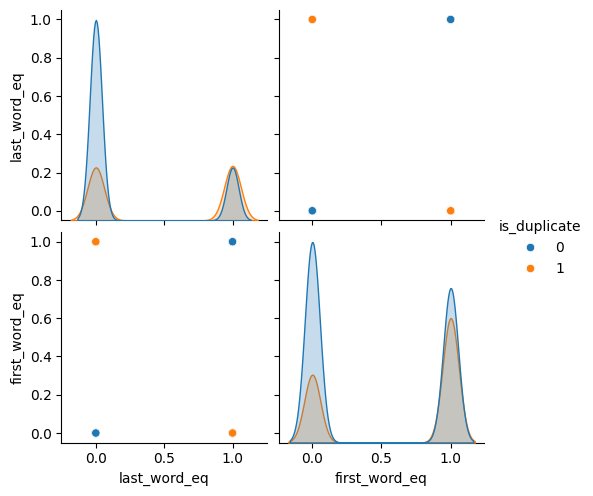

In [43]:
sns.pairplot(
    new_DataFrame[['last_word_eq', 'first_word_eq', 'is_duplicate']],
    hue='is_duplicate'
)

plt.show()


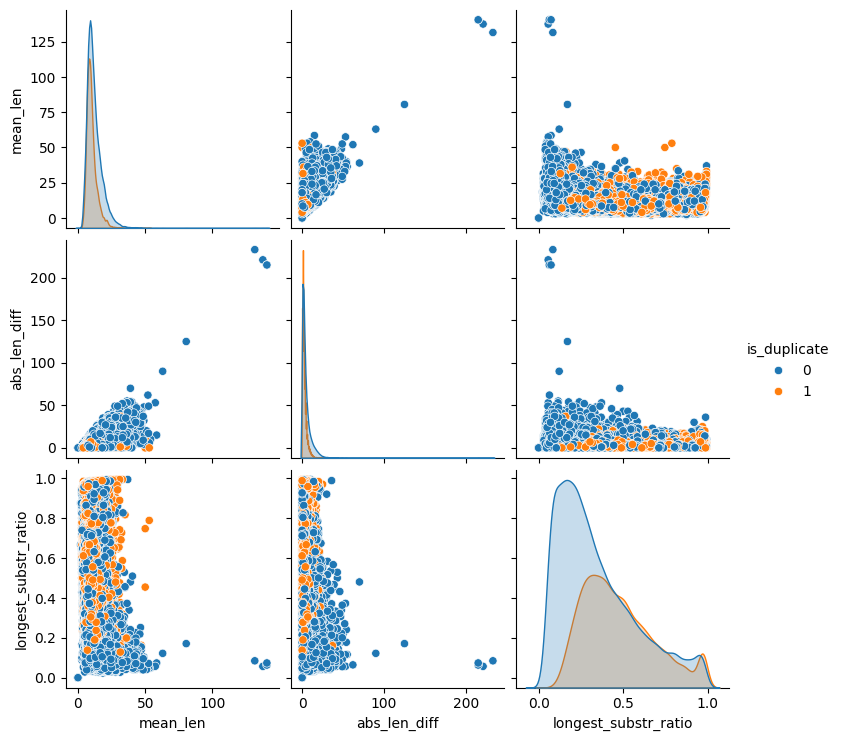

In [44]:
sns.pairplot(
    new_DataFrame[['mean_len', 'abs_len_diff', 'longest_substr_ratio', 'is_duplicate']],
    hue='is_duplicate'
)

plt.show()

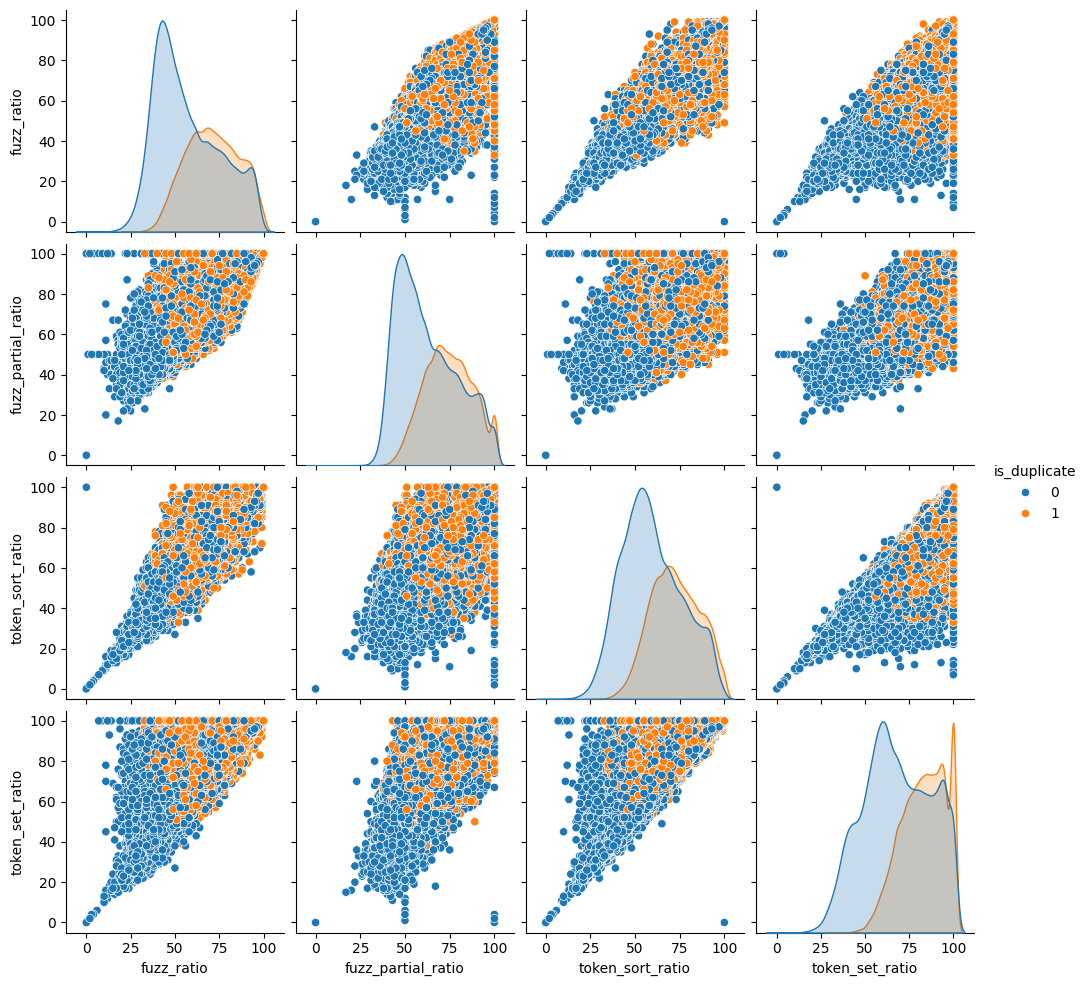

In [45]:
sns.pairplot(
    new_DataFrame[['fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']],
    hue='is_duplicate'
)

plt.show()

In [46]:
# Using TSNE for Dimentionality reduction for 15 Features
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_DataFrame[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_DataFrame['is_duplicate'].values

In [47]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random',      
    random_state=101,
    method='barnes_hut',
    max_iter=1000,     
    verbose=2,
    angle=0.5
).fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.158s...
[t-SNE] Computed neighbors for 100000 samples in 15.481s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probab

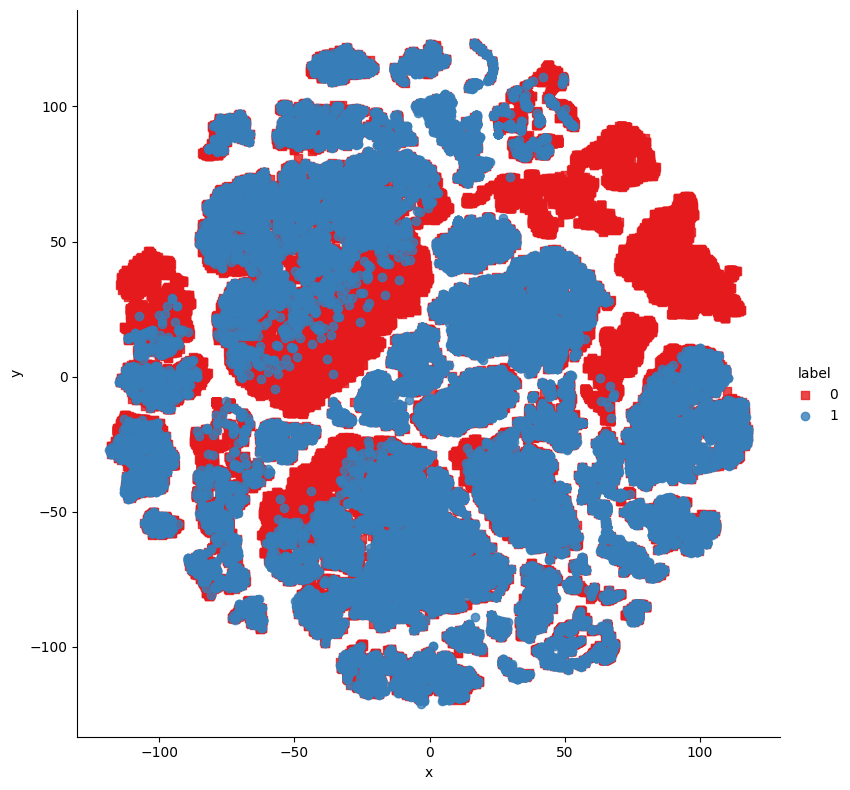

In [48]:
import seaborn as sns

x_df = pd.DataFrame({'x': tsne2d[:,0], 'y': tsne2d[:,1], 'label': y})

sns.lmplot(
    data=x_df,
    x='x',
    y='y',
    hue='label',
    fit_reg=False,
    height=8,          
    palette="Set1",
    markers=['s','o']
)


In [49]:
from sklearn.manifold import TSNE

tsne3d = TSNE(
    n_components=3,
    init='random',       
    random_state=101,
    method='barnes_hut',
    max_iter=1000,  
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.170s...
[t-SNE] Computed neighbors for 100000 samples in 16.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probab

In [50]:
import plotly.graph_objs as go
import plotly.io as pio

# Force Plotly to use the browser instead of inline notebook rendering
pio.renderers.default = "browser"

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=y,
        colorscale='Portland',
        colorbar=dict(title='duplicate'),
        opacity=0.75
    )
)

fig = go.Figure(data=[trace1])
fig.update_layout(height=800, width=800, title='3D embedding with engineered features')

fig.show()  

In [51]:
ques_DataFrame = new_DataFrame[['question1','question2']]
ques_DataFrame.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...
327711,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [52]:
final_DataFrame = new_DataFrame.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_DataFrame.shape)
final_DataFrame.head()

(100000, 23)


,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,0,47,55,12,15,7,22,0.32,0.666644,0.499988,...,0.466664,1.0,1.0,3.0,13.5,0.229167,69,66,67,74
327711,0,102,118,26,20,3,36,0.08,0.000000,0.000000,...,0.115384,0.0,0.0,6.0,23.0,0.048544,42,41,39,46
367788,0,57,143,13,30,0,32,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,17.0,21.5,0.051724,37,49,38,40
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,...,0.333330,1.0,0.0,4.0,7.0,0.542857,60,71,48,69


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_DataFrame['question1']) + list(ques_DataFrame['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [54]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_DataFrame.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_DataFrame.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(100000, 6000)

In [55]:
final_DataFrame = pd.concat([final_DataFrame, temp_df], axis=1)
print(final_DataFrame.shape)
final_DataFrame.head()

(100000, 6023)


,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
115086,0,47,55,12,15,7,22,0.32,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
327711,0,102,118,26,20,3,36,0.08,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,57,143,13,30,0,32,0.00,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_DataFrame.iloc[:,1:].values,final_DataFrame.iloc[:,0].values,test_size=0.2,random_state=1)

In [57]:
# Check for infinity values
print("Infinity values in X_train:", np.isinf(X_train).sum())
print("Infinity values in X_test:", np.isinf(X_test).sum())

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())


Infinity values in X_train: 1
Infinity values in X_test: 0
NaN values in X_train: 0
NaN values in X_test: 0


In [58]:
X_train = np.nan_to_num(X_train, nan=0.0, posinf=1e10, neginf=-1e10)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Accuracy :", accuracy)
print("Error Rate :", error_rate)
print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1)


Accuracy : 0.8064
Error Rate : 0.1936
Precision : 0.7550990675990676
Recall : 0.7028749660970979
F1 Score : 0.7280516926534626


In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)

# Predictions
y_pred1 = xgb.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred1)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# Print results
print("Accuracy :", accuracy)
print("Error Rate :", error_rate)
print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1)


Accuracy : 0.79815
Error Rate : 0.20184999999999997
Precision : 0.7295363873985418
Recall : 0.7191483590995389
F1 Score : 0.7243051287304514


In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[10945,  1681],
       [ 2191,  5183]])

In [63]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[10660,  1966],
       [ 2071,  5303]])

In [64]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [65]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [66]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [67]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [68]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [69]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [70]:
q1 = 'What is the capital city of Bangladesh?'
q2 = 'Which city is the current capital of Bangladesh?'
q3 = 'What is the largest city in India?'
q4 = 'Which city is known as the commercial capital of India?'


In [71]:
rf.predict(query_point_creator(q1,q2))

array([1])

In [72]:
rf.predict(query_point_creator(q1,q4))

array([0])

In [73]:
cv

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (strip_accents and lowercase) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"stop_words stop_words: {'english'}, list, default=NoneIf 'english', a built-in stop word list for English is used.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",None
,"token_pattern token_pattern: str or None, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp select tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentword n-grams or char n-grams to be extracted. All values of n suchsuch that min_n <= n <= max_n will be used. For example an``ngram_range`` of ``(1, 1)`` means only unigrams, ``(1, 2)`` meansunigrams and bigrams, and ``(2, 2)`` means only bigrams.Only applies if ``analyzer`` is not callable.","(1, ...)"
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word n-gram or charactern-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21Since v0.21, if ``input`` is ``filename`` or ``file``, the data isfirst read from the file and then passed to the given callableanalyzer.",'word'


In [74]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))
